In [1]:
import os
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# Figure 2
---
#### This Figure aims to show the efffect of Hierarchy on a simple SNN with LIF neurons on the SHD task.

##### First, the optimal operating point as far as time constant is found on a conventional SNN. 
##### Then, hierarchy is imposed on the SNN without and with recurrent connections. 
##### At last, the number of layer is swept to show the effect of making the network deeper.

- Shape of the Hierarchy \
parametrizing the time constant through the layers as a Tanh function, with center and steepness as parameters. Looking for the best combo of hyperparameter on the SHD task

/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_16513/3707757593.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df_origin[df_origin['experiment_name']=='test_tau_mem'][df_origin['n_hid']==32]


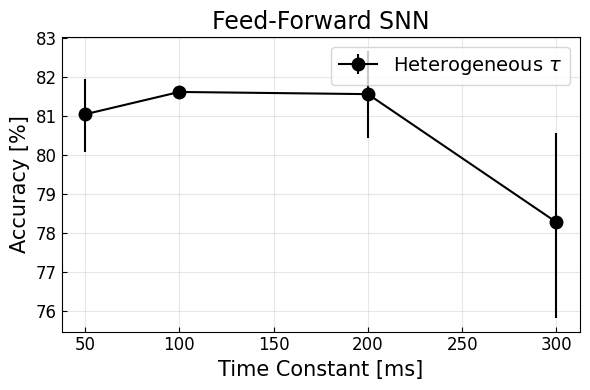

In [102]:
### time constant sweep
# load file
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_dir = '/Users/filippomoro/Documents/hsnn/results'
file_name = os.path.join( file_dir, 'Sweep_tanh_SHD_wandb_export_2024-05-02T08_31_33.440+02_00.csv' )
df_origin = pd.read_csv( file_name, delimiter=',' )

#####################################
### select the feed-forward LIF model
df = df_origin[df_origin['experiment_name']=='test_tau_mem'][df_origin['n_hid']==32]

tau_mem_list = np.sort( list( set( list(df['tau_mem'] ) ) ) ).astype( np.float32 )
# With Heterogeneity of Time constant
mean_acc_tau_mem = np.array( [ df['Test Acc'][df['tau_mem']==str(tau)][df['distrib_tau']=='uniform'].mean() for tau in tau_mem_list] )
max_acc_tau_mem = np.array( [ df['Test Acc'][df['tau_mem']==str(tau)][df['distrib_tau']=='uniform'].quantile(0.85) for tau in tau_mem_list] )
min_acc_tau_mem = np.array( [ df['Test Acc'][df['tau_mem']==str(tau)][df['distrib_tau']=='uniform'].quantile(0.15) for tau in tau_mem_list] )

fig, ax = plt.subplots( figsize=(6,4) )
# With Heterogeneity of Time constant
# ax.plot( tau_mem_list*1e3, mean_acc_tau_mem, color='k', marker='o', ms=9, label=r'Heterogeneous $\tau$' )
# ax.fill_between( tau_mem_list*1e3, min_acc_tau_mem, max_acc_tau_mem, color='k', alpha=0.2 )
yerr_list = [mean_acc_tau_mem-min_acc_tau_mem, max_acc_tau_mem-mean_acc_tau_mem]
hierarchy_plot = ax.errorbar( tau_mem_list*1e3, mean_acc_tau_mem, yerr=yerr_list,
                color='k', marker='o', ms=9, 
                label=r'Heterogeneous $\tau$')
# plot setting
ax.set_title( 'Feed-Forward SNN', size=17 )
ax.set_xlabel('Time Constant [ms]', size=15); ax.set_ylabel('Accuracy [%]', size=15)
ax.tick_params( direction='in', labelsize=12 )
ax.legend(prop={'size':14})
ax.grid(alpha=0.3)
plt.tight_layout()

/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_3235/3521080703.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df_origin[df_origin['experiment_name']=='Hierarchy_shape_SHD']\
/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_3235/3521080703.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df_origin[df_origin['experiment_name']=='Hierarchy_shape_SHD']\
/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_3235/3521080703.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df_origin[df_origin['experiment_name']=='Hierarchy_shape_SHD']\
/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_3235/3521080703.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ref = df_origin[df_origin['experiment_name']=='Hierarchy_shape_SHD']\
/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_3235/3521080703.py:16

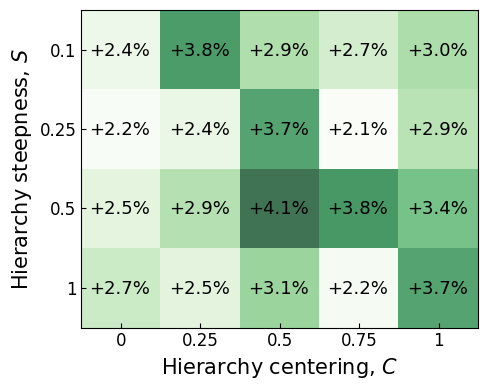

In [25]:
### time constant
# load file
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_dir = '/Users/filippomoro/Documents/hsnn/results'
# file_name = os.path.join( file_dir, 'Sweep_tanh_SHD_wandb_export_2024-04-30T12_10_25.854+02_00.csv' )
# file_name = os.path.join( file_dir, 'Sweep_tanh_SHD_wandb_export_2024-05-02T08_31_33.440+02_00.csv' )
file_name = os.path.join( file_dir, 'Sweep_tanh_SHD_wandb_export_2024-05-07T10_04_54.186+02_00.csv' )
df_origin = pd.read_csv( file_name, delimiter=',' )
df = df_origin[df_origin['experiment_name']=='Hierarchy_shape_SHD']\
        [df_origin['hierarchy_tau']=='tanh'][df_origin['n_hid']==32][df_origin['delta_tau']==0.15]

# reference: without Hierarchy
df_ref = df_origin[df_origin['experiment_name']=='Hierarchy_shape_SHD']\
        [df_origin['delta_tau']==0.][df_origin['n_hid']==32]
Test_acc_ref = df_ref['Test Acc'].median()

# List of Time constant
tanh_center_list = np.sort( list( set( list(df['tanh_center'] ) ) ) )
tanh_coef_list  = np.sort( list( set( list(df['tanh_coef'] ) ) ) )
seed_list = np.sort( list( set( list(df['seed'] ) ) ) )

# Test_acc_tanh = np.zeros( (len(tanh_center_list), len(tanh_coef_list), len(seed_list)) )
Test_acc_tanh = np.zeros( (len(tanh_center_list), len(tanh_coef_list)) )
for i, center in enumerate(tanh_center_list):
    for j, coef in enumerate(tanh_coef_list):
        Test_acc_tanh[i,j] = df['Test Acc'][ df['tanh_center']==center ][df['tanh_coef']==coef].median() - Test_acc_ref

fig, ax = plt.subplots( figsize=(6,4) )
ax.imshow( Test_acc_tanh.T, cmap='Greens', alpha=0.75 )
for i, center in enumerate(tanh_center_list):
    for j, coef in enumerate(tanh_coef_list):
        ax.text( i-0.4, j+0.075, f'+{Test_acc_tanh[i,j]:.1f}%', color='k', fontsize=13, multialignment='center' )
# plot setting
# ax.set_title( 'Feed-Forward SNN', size=17 )
ax.set_xlabel('Hierarchy centering, $C$', size=15); ax.set_ylabel('Hierarchy steepness, $S$', size=15)
ax.tick_params( direction='in', labelsize=12 )
ax.set_yticks( np.arange(len(tanh_coef_list)), tanh_coef_list ); 
ax.set_xticks( np.arange(len(tanh_center_list)), tanh_center_list )
# ax.legend(prop={'size':14})
# ax.grid(alpha=0.3)
plt.tight_layout()
fig.savefig( os.path.join( os.getcwd(), 'results/F2_Tanh_SHD.pdf' ), dpi=300, transparent=True )

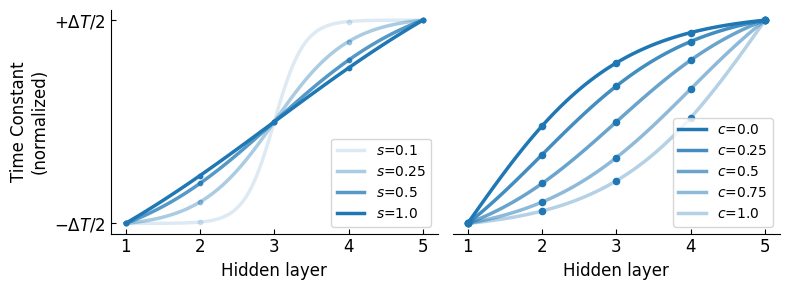

In [3]:
### Plotting the Tanh function for visualization purposes

tanh = lambda x, a: (np.exp(2*x/a)-1)/(np.exp(2*x/a)+1)
rescale = lambda x: ( x - np.min(x) ) / (np.max( np.abs( x - np.min(x) ) )) - 0.5

fig, ax = plt.subplots( 1, 2, figsize=(8,3) )
# tanh with coef
x_axis = np.linspace(0,1,100)
# hierarchy = tanh( (np.linspace(0,1,5)-0.5), 0.5 )
# hierarchy_func = tanh( x_axis-0.5, 0.5 )
# rescaled_hierarchy = rescale(hierarchy)
# rescaled_hierarchy_func = rescale(hierarchy_func)
# # ax[0].scatter( (np.linspace(0,1,5)), rescaled_hierarchy, color='tab:blue', s=15 )
# # ax[0].plot( x_axis, rescaled_hierarchy_func, color='tab:blue', lw=2, alpha=1 )
for coef in tanh_coef_list:
        hierarchy_func = tanh( x_axis-0.5, coef )
        rescaled_hierarchy_func = rescale(hierarchy_func)
        ax[0].plot( x_axis, rescaled_hierarchy_func, color='tab:blue', lw=2.5, alpha=np.clip(np.abs(coef*1.5), 0, 1),
                   label=f'$s$={coef}')
        hierarchy = tanh( (np.linspace(0,1,5)-0.5), coef )
        rescaled_hierarchy = rescale(hierarchy)
        ax[0].scatter( (np.linspace(0,1,5)), rescaled_hierarchy, color='tab:blue', s=10, alpha=np.clip(np.abs(coef*1.5), 0, 1) )
ax[0].set_xlabel( 'Hidden layer', size=12 )
ax[0].set_ylabel( 'Time Constant\n(normalized)', size=12 )
ax[0].set_yticks( [] )
ax[0].set_yticks( [-0.5, 0.5], ['$-\Delta T/2$', '$+\Delta T/2$'] )
ax[0].set_xticks( (np.linspace(0,1,5)), (np.linspace(1,5,5)).astype(int) )
ax[0].legend(prop={'size':10}, loc=4)
ax[0].tick_params( direction='in', labelsize=12 )
ax[0].spines[['right', 'top']].set_visible(False)

# tanh with center
x_axis = np.linspace(0,1,100)
# hierarchy = tanh( (np.linspace(0,1,5)-0.5), 0.5 )
# hierarchy_func = tanh( x_axis-0.5, 0.5 )
# rescaled_hierarchy = rescale(hierarchy)
# rescaled_hierarchy_func = rescale(hierarchy_func)
# ax[1].scatter( (np.linspace(0,1,5)), rescaled_hierarchy, color='tab:blue', s=15 )
# ax[1].plot( x_axis, rescaled_hierarchy_func, color='tab:blue', lw=2, alpha=1 )
for center in tanh_center_list:
        hierarchy_func = tanh( x_axis-center, 0.5 )
        rescaled_hierarchy_func = rescale(hierarchy_func)
        ax[1].plot( x_axis, rescaled_hierarchy_func, color='tab:blue', lw=2.5, alpha=np.abs(1.-center/1.5),
                   label=f'$c$={center}')
        hierarchy = tanh( (np.linspace(0,1,5)-center), 0.5 )
        rescaled_hierarchy = rescale(hierarchy)
        ax[1].scatter( (np.linspace(0,1,5)), rescaled_hierarchy, color='tab:blue', s=20 )
ax[1].set_xlabel( 'Hidden layer', size=12 )
ax[1].set_yticks( [] )
ax[0].set_yticks( [-0.5, 0.5], ['$-\Delta T/2$', '$+\Delta T/2$'] )
ax[1].set_xticks( (np.linspace(0,1,5)), (np.linspace(1,5,5)).astype(int) )
ax[1].legend(prop={'size':10}, loc=4)
ax[1].tick_params( direction='in', labelsize=12 )
ax[1].spines[['right', 'top', 'left']].set_visible(False)

plt.tight_layout()
fig.savefig( os.path.join( os.getcwd(), 'results/F2_Tanh_shape.pdf' ), dpi=300, transparent=True )

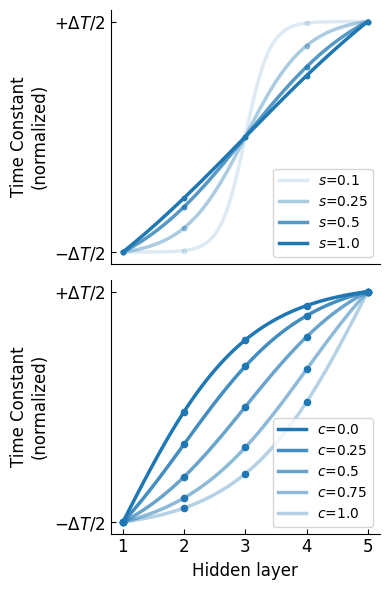

In [4]:
### Plotting the Tanh function for visualization purposes

tanh = lambda x, a: (np.exp(2*x/a)-1)/(np.exp(2*x/a)+1)
rescale = lambda x: ( x - np.min(x) ) / (np.max( np.abs( x - np.min(x) ) )) - 0.5

fig, ax = plt.subplots( 2, 1, figsize=(4,6) )
# tanh with coef
x_axis = np.linspace(0,1,100)
# hierarchy = tanh( (np.linspace(0,1,5)-0.5), 0.5 )
# hierarchy_func = tanh( x_axis-0.5, 0.5 )
# rescaled_hierarchy = rescale(hierarchy)
# rescaled_hierarchy_func = rescale(hierarchy_func)
# # ax[0].scatter( (np.linspace(0,1,5)), rescaled_hierarchy, color='tab:blue', s=15 )
# # ax[0].plot( x_axis, rescaled_hierarchy_func, color='tab:blue', lw=2, alpha=1 )
for coef in tanh_coef_list:
        hierarchy_func = tanh( x_axis-0.5, coef )
        rescaled_hierarchy_func = rescale(hierarchy_func)
        ax[0].plot( x_axis, rescaled_hierarchy_func, color='tab:blue', lw=2.5, alpha=np.clip(np.abs(coef*1.5), 0, 1),
                   label=f'$s$={coef}')
        hierarchy = tanh( (np.linspace(0,1,5)-0.5), coef )
        rescaled_hierarchy = rescale(hierarchy)
        ax[0].scatter( (np.linspace(0,1,5)), rescaled_hierarchy, color='tab:blue', s=10, alpha=np.clip(np.abs(coef*1.5), 0, 1) )
# ax[0].set_xlabel( 'Hidden layer', size=12 )
ax[0].set_ylabel( 'Time Constant\n(normalized)', size=12 )
ax[0].set_yticks( [] )
ax[0].set_yticks( [-0.5, 0.5], ['$-\Delta T/2$', '$+\Delta T/2$'] )
# ax[0].set_xticks( (np.linspace(0,1,5)), (np.linspace(1,5,5)).astype(int) )
ax[0].set_xticks( [] )
ax[0].legend(prop={'size':10}, loc=4)
ax[0].tick_params( direction='in', labelsize=12 )
ax[0].spines[['right', 'top']].set_visible(False)

# tanh with center
x_axis = np.linspace(0,1,100)
# hierarchy = tanh( (np.linspace(0,1,5)-0.5), 0.5 )
# hierarchy_func = tanh( x_axis-0.5, 0.5 )
# rescaled_hierarchy = rescale(hierarchy)
# rescaled_hierarchy_func = rescale(hierarchy_func)
# ax[1].scatter( (np.linspace(0,1,5)), rescaled_hierarchy, color='tab:blue', s=15 )
# ax[1].plot( x_axis, rescaled_hierarchy_func, color='tab:blue', lw=2, alpha=1 )
for center in tanh_center_list:
        hierarchy_func = tanh( x_axis-center, 0.5 )
        rescaled_hierarchy_func = rescale(hierarchy_func)
        ax[1].plot( x_axis, rescaled_hierarchy_func, color='tab:blue', lw=2.5, alpha=np.abs(1.-center/1.5),
                   label=f'$c$={center}')
        hierarchy = tanh( (np.linspace(0,1,5)-center), 0.5 )
        rescaled_hierarchy = rescale(hierarchy)
        ax[1].scatter( (np.linspace(0,1,5)), rescaled_hierarchy, color='tab:blue', s=20 )
ax[1].set_xlabel( 'Hidden layer', size=12 )
ax[1].set_ylabel( 'Time Constant\n(normalized)', size=12 )
ax[1].set_yticks( [] )
ax[1].set_yticks( [-0.5, 0.5], ['$-\Delta T/2$', '$+\Delta T/2$'] )
ax[1].set_xticks( (np.linspace(0,1,5)), (np.linspace(1,5,5)).astype(int) )
ax[1].legend(prop={'size':10}, loc=4)
ax[1].tick_params( direction='in', labelsize=12 )
ax[1].spines[['right', 'top']].set_visible(False)

plt.tight_layout()
fig.savefig( os.path.join( os.getcwd(), 'results/F2_Tanh_shape_vertical.pdf' ), dpi=300, transparent=True )

- No Hierarchy, what is the best Time Constant for a 4 layers network?

In [2]:
### time constant
# load file
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_dir = '/Users/filippomoro/Documents/hsnn/results'
# file_name = os.path.join( file_dir, 'Sweep_tau_mem_wandb_export_2024-03-25T09_22_38.384+01_00.csv' ) # Sweep_tau_mem_wandb_export_2024-04-04T09_35_21.670+02_00.csv
file_name = os.path.join( file_dir, 'Sweep_tau_mem_wandb_export_2024-04-04T09_35_21.670+02_00.csv' ) # Sweep_tau_mem_wandb_export_2024-04-04T09_35_21.670+02_00.csv
df = pd.read_csv( file_name, delimiter=',' )

# List of Time constant
tau_mem_list = np.sort( list( set( list(df['tau_mem'] ) ) ) )

/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_28563/95321618.py:88: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


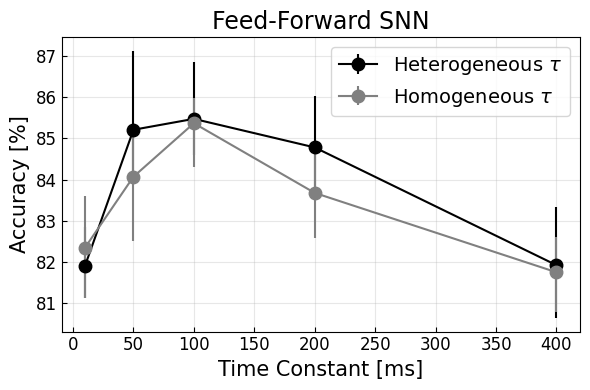

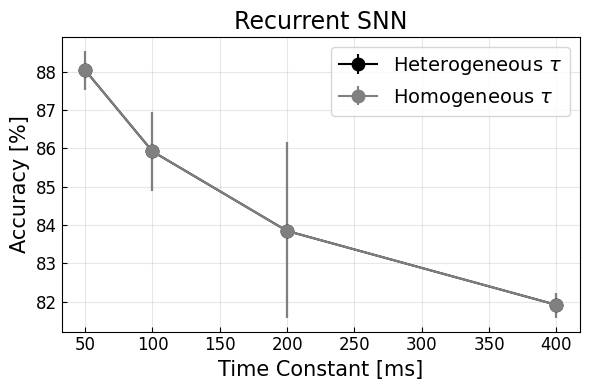

In [11]:
### time constant sweep
# load file
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_dir = '/Users/filippomoro/Documents/hsnn/results'
# file_name = os.path.join( file_dir, 'Sweep_tau_mem_wandb_export_2024-03-25T09_22_38.384+01_00.csv' ) # Sweep_tau_mem_wandb_export_2024-04-04T09_35_21.670+02_00.csv
file_name = os.path.join( file_dir, 'Sweep_tau_mem_wandb_export_2024-04-04T09_35_21.670+02_00.csv' ) # Sweep_tau_mem_wandb_export_2024-04-04T09_35_21.670+02_00.csv
df_origin = pd.read_csv( file_name, delimiter=',' )


#####################################
### select the feed-forward LIF model
df = df_origin[df_origin['recurrent']==False]

tau_mem_list = np.sort( list( set( list(df['tau_mem'] ) ) ) )[:-1]
# With Heterogeneity of Time constant
mean_acc_tau_mem = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']==True].mean() for tau in tau_mem_list] )
max_acc_tau_mem = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']==True].quantile(0.85) for tau in tau_mem_list] )
min_acc_tau_mem = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']==True].quantile(0.15) for tau in tau_mem_list] )
# With Homogeneity of Time constant
mean_acc_tau_mem_hom = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']==False].mean() for tau in tau_mem_list] )
max_acc_tau_mem_hom = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']==False].quantile(0.85) for tau in tau_mem_list] )
min_acc_tau_mem_hom = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']==False].quantile(0.15) for tau in tau_mem_list] )

fig, ax = plt.subplots( figsize=(6,4) )
# With Heterogeneity of Time constant
# ax.plot( tau_mem_list*1e3, mean_acc_tau_mem, color='k', marker='o', ms=9, label=r'Heterogeneous $\tau$' )
# ax.fill_between( tau_mem_list*1e3, min_acc_tau_mem, max_acc_tau_mem, color='k', alpha=0.2 )
yerr_list = [mean_acc_tau_mem-min_acc_tau_mem, max_acc_tau_mem-mean_acc_tau_mem]
hierarchy_plot = ax.errorbar( tau_mem_list*1e3, mean_acc_tau_mem, yerr=yerr_list,
                color='k', marker='o', ms=9, 
                label=r'Heterogeneous $\tau$')
# With Homogeneity of Time constant
# ax.plot( tau_mem_list*1e3, mean_acc_tau_mem_hom, color='gray', marker='^', ms=9, label=r'Homogeneous $\tau$' )
# ax.fill_between( tau_mem_list*1e3, min_acc_tau_mem_hom, max_acc_tau_mem_hom, color='gray', alpha=0.1 )
yerr_list = [mean_acc_tau_mem_hom-min_acc_tau_mem_hom, max_acc_tau_mem_hom-mean_acc_tau_mem_hom]
hierarchy_plot = ax.errorbar( tau_mem_list*1e3, mean_acc_tau_mem_hom, yerr=yerr_list,
                color='gray', marker='o', ms=9, 
                label=r'Homogeneous $\tau$')
# plot setting
ax.set_title( 'Feed-Forward SNN', size=17 )
ax.set_xlabel('Time Constant [ms]', size=15); ax.set_ylabel('Accuracy [%]', size=15)
ax.tick_params( direction='in', labelsize=12 )
ax.legend(prop={'size':14})
ax.grid(alpha=0.3)
plt.tight_layout()
# fig.savefig( os.path.join( os.getcwd(), 'results/Tau_mem_sweep.pdf' ), dpi=300, transparent=True )


#####################################
# select the recurrent LIF model
df = df_origin[df_origin['recurrent']==True]

tau_mem_list = np.sort( list( set( list(df['tau_mem'] ) ) ) )[1:]
# With Heterogeneity of Time constant
mean_acc_tau_mem = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']==True].mean() for tau in tau_mem_list] )
max_acc_tau_mem = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']==True].quantile(0.85) for tau in tau_mem_list] )
min_acc_tau_mem = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']==True].quantile(0.15) for tau in tau_mem_list] )
# With Homogeneity of Time constant
mean_acc_tau_mem_hom = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']==False].mean() for tau in tau_mem_list] )
max_acc_tau_mem_hom = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']==False].quantile(0.85) for tau in tau_mem_list] )
min_acc_tau_mem_hom = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']==False].quantile(0.15) for tau in tau_mem_list] )

fig, ax = plt.subplots( figsize=(6,4) )
# With Heterogeneity of Time constant
# ax.plot( tau_mem_list*1e3, mean_acc_tau_mem, color='k', marker='o', ms=9, label=r'Heterogeneous $\tau$' )
# ax.fill_between( tau_mem_list*1e3, min_acc_tau_mem, max_acc_tau_mem, color='k', alpha=0.2 )
yerr_list = [mean_acc_tau_mem-min_acc_tau_mem, max_acc_tau_mem-mean_acc_tau_mem]
hierarchy_plot = ax.errorbar( tau_mem_list*1e3, mean_acc_tau_mem, yerr=yerr_list,
                color='k', marker='o', ms=9, 
                label=r'Heterogeneous $\tau$')
# With Homogeneity of Time constant
# ax.plot( tau_mem_list*1e3, mean_acc_tau_mem_hom, color='gray', marker='^', ms=9, label=r'Homogeneous $\tau$' )
# ax.fill_between( tau_mem_list*1e3, min_acc_tau_mem_hom, max_acc_tau_mem_hom, color='gray', alpha=0.1 )
yerr_list = [mean_acc_tau_mem_hom-min_acc_tau_mem_hom, max_acc_tau_mem_hom-mean_acc_tau_mem_hom]
hierarchy_plot = ax.errorbar( tau_mem_list*1e3, mean_acc_tau_mem_hom, yerr=yerr_list,
                color='gray', marker='o', ms=9, 
                label=r'Homogeneous $\tau$')
# plot setting
ax.set_title( 'Recurrent SNN', size=17 )
ax.set_xlabel('Time Constant [ms]', size=15); ax.set_ylabel('Accuracy [%]', size=15)
ax.tick_params( direction='in', labelsize=12 )
ax.legend(prop={'size':14})
ax.grid(alpha=0.3)
plt.tight_layout()
fig.show()
# fig.savefig( os.path.join( os.getcwd(), 'results/Tau_mem_sweep_RLIF.pdf' ), dpi=300, transparent=True )

- Sweeping the Time Constant Hierarchy

/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_3235/1137370712.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df_origin[ df_origin['recurrent']==False ][ df_origin['n_layers']==6 ]


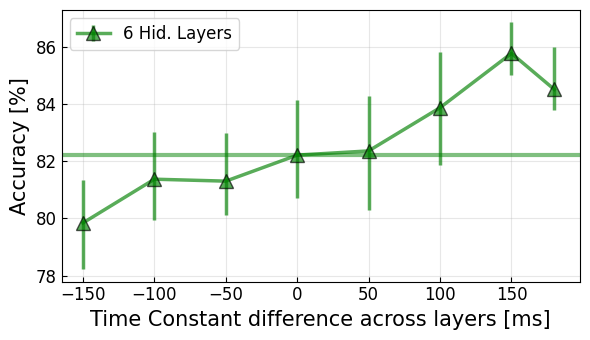

In [47]:
### delta tau --> hierarchical
# load file
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_dir = '/Users/filippomoro/Documents/hsnn/results'
# file_name = os.path.join( file_dir, 'Sweep_delta_tau_wandb_export_2024-03-25T09_21_13.935+01_00.csv' ) # Sweep_delta_tau_wandb_export_2024-04-04T09_52_08.706+02_00.csv
file_name = os.path.join( file_dir, 'Sweep_SHD_Delta_tau_wandb_export_2024-05-06T13_49_34.991+02_00.csv' ) # Sweep_delta_tau_wandb_export_2024-04-04T09_52_08.706+02_00.csv
df_origin = pd.read_csv( file_name, delimiter=',' )

#####################################
### select the feed-forward LIF model
df4 = df_origin[ df_origin['recurrent']==False ][ df_origin['n_layers']==6 ]
# df3 = df_origin[ df_origin['recurrent']==False ][ df_origin['n_layers']==3 ]

delta_tau_list = np.sort( list( set( list(df4['delta_tau'] ) ) ) )
# delete two unnecessary datapoints
delta_tau_list = np.delete( delta_tau_list, delta_tau_list==0.001 )
delta_tau_list = np.delete( delta_tau_list, delta_tau_list==-0.001 )

# Heterogeneity 6 layers
mean_acc_delta_tau = np.array( [ df4['Test Acc'][df4['delta_tau']==tau].mean() for tau in delta_tau_list] )
max_acc_delta_tau = np.array( [ df4['Test Acc'][df4['delta_tau']==tau].quantile(0.85) for tau in delta_tau_list] )
min_acc_delta_tau = np.array( [ df4['Test Acc'][df4['delta_tau']==tau].quantile(0.15) for tau in delta_tau_list] )

fig, ax = plt.subplots( figsize=(6,3.5) )
# Heterogeneity 3 layers
# ax.plot( delta_tau_list*1e3, mean_acc_delta_tau, color='darkgreen', marker='o', ms=10, label=r'Heterogeneity $\tau$' )
# ax.fill_between( delta_tau_list*1e3, min_acc_delta_tau, max_acc_delta_tau, color='tab:green', alpha=0.2 )
yerr_list = [mean_acc_delta_tau-min_acc_delta_tau, max_acc_delta_tau-mean_acc_delta_tau]
hierarchy_plot = ax.errorbar( delta_tau_list*1e3, mean_acc_delta_tau, yerr=yerr_list, 
                color='green', marker='^', ms=10, alpha=0.65, lw=2.5, markeredgecolor='k',
                label=r'6 Hid. Layers')
# plot a horizontal line for clarity
ax.hlines( df4['Test Acc'][df4['delta_tau']==0.].mean(), -200, 200, 
          color='green', lw=3, alpha=0.5, ls='-'  )
ax.set_xlim( delta_tau_list[0]*1e3*1.1, delta_tau_list[-1]*1e3*1.1 )

ax.set_xlabel('Time Constant difference across layers [ms]', size=15); ax.set_ylabel('Accuracy [%]', size=15)
ax.tick_params( direction='in', labelsize=12 )
ax.legend(prop={'size':12}, loc=2)
ax.grid(alpha=0.3)
plt.tight_layout()

fig.savefig( os.path.join( os.getcwd(), 'results/Delta_tau_SHD_sweep.pdf' ), dpi=300, transparent=True )

/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_28563/379503235.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df_origin[ df_origin['recurrent']==False ][ df_origin['n_layers']==4 ]
/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_28563/379503235.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df_origin[ df_origin['recurrent']==False ][ df_origin['n_layers']==3 ]
/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_28563/379503235.py:73: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df_origin[ df_origin['recurrent']==True ][ df_origin['n_layers']==4 ]


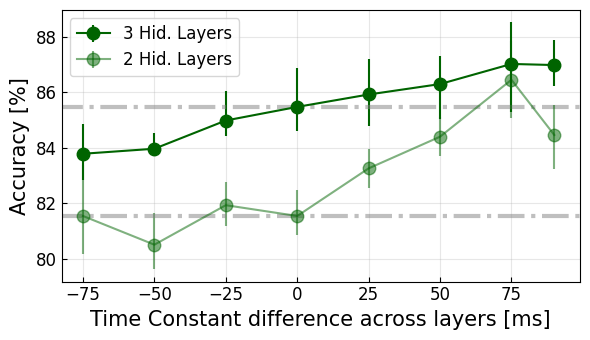

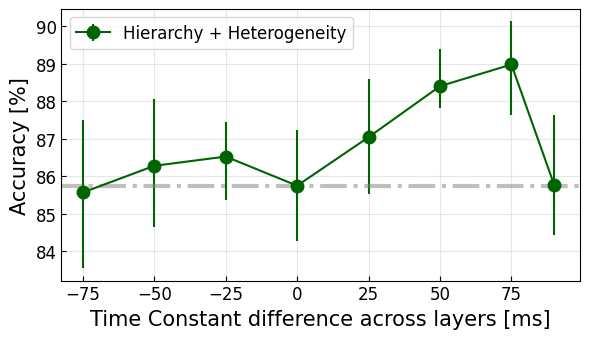

In [46]:
### delta tau --> hierarchical
# load file
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_dir = '/Users/filippomoro/Documents/hsnn/results'
# file_name = os.path.join( file_dir, 'Sweep_delta_tau_wandb_export_2024-03-25T09_21_13.935+01_00.csv' ) # Sweep_delta_tau_wandb_export_2024-04-04T09_52_08.706+02_00.csv
file_name = os.path.join( file_dir, 'Sweep_delta_tau_wandb_export_2024-04-04T09_52_08.706+02_00.csv' ) # Sweep_delta_tau_wandb_export_2024-04-04T09_52_08.706+02_00.csv
df_origin = pd.read_csv( file_name, delimiter=',' )

#####################################
### select the feed-forward LIF model
df4 = df_origin[ df_origin['recurrent']==False ][ df_origin['n_layers']==4 ]
df3 = df_origin[ df_origin['recurrent']==False ][ df_origin['n_layers']==3 ]

delta_tau_list = np.sort( list( set( list(df4['delta_tau'] ) ) ) )
# delete two unnecessary datapoints
delta_tau_list = np.delete( delta_tau_list, delta_tau_list==0.001 )
delta_tau_list = np.delete( delta_tau_list, delta_tau_list==-0.001 )
# Heterogeneity 4 layers
mean_acc_delta_tau = np.array( [ df4['Test Acc'][df4['delta_tau']==tau][df4['distrib_tau']=='true'].mean() for tau in delta_tau_list] )
max_acc_delta_tau = np.array( [ df4['Test Acc'][df4['delta_tau']==tau][df4['distrib_tau']=='true'].quantile(0.85) for tau in delta_tau_list] )
min_acc_delta_tau = np.array( [ df4['Test Acc'][df4['delta_tau']==tau][df4['distrib_tau']=='true'].quantile(0.15) for tau in delta_tau_list] )
# Heterogeneity 3 layers
mean_acc_delta_tau3 = np.array( [ df3['Test Acc'][df3['delta_tau']==tau][df3['distrib_tau']=='unif'].mean() for tau in delta_tau_list] )
max_acc_delta_tau3 = np.array( [ df3['Test Acc'][df3['delta_tau']==tau][df3['distrib_tau']=='unif'].quantile(0.85) for tau in delta_tau_list] )
min_acc_delta_tau3 = np.array( [ df3['Test Acc'][df3['delta_tau']==tau][df3['distrib_tau']=='unif'].quantile(0.15) for tau in delta_tau_list] )
# Homogeneity
mean_acc_delta_tau_hom = np.array( [ df4['Test Acc'][df4['delta_tau']==tau][df4['distrib_tau']=='false'].mean() for tau in delta_tau_list] )
max_acc_delta_tau_hom = np.array( [ df4['Test Acc'][df4['delta_tau']==tau][df4['distrib_tau']=='false'].quantile(0.85) for tau in delta_tau_list] )
min_acc_delta_tau_hom = np.array( [ df4['Test Acc'][df4['delta_tau']==tau][df4['distrib_tau']=='false'].quantile(0.15) for tau in delta_tau_list] )

fig, ax = plt.subplots( figsize=(6,3.5) )
# Heterogeneity 3 layers
# ax.plot( delta_tau_list*1e3, mean_acc_delta_tau, color='darkgreen', marker='o', ms=10, label=r'Heterogeneity $\tau$' )
# ax.fill_between( delta_tau_list*1e3, min_acc_delta_tau, max_acc_delta_tau, color='tab:green', alpha=0.2 )
yerr_list = [mean_acc_delta_tau-min_acc_delta_tau, max_acc_delta_tau-mean_acc_delta_tau]
hierarchy_plot = ax.errorbar( delta_tau_list*1e3, mean_acc_delta_tau, yerr=yerr_list, 
                color='darkgreen', marker='o', ms=9,
                label=r'3 Hid. Layers')
# plot a horizontal line for clarity
ax.hlines( df4['Test Acc'][df4['delta_tau']==0.][df4['distrib_tau']=='true'].mean(), -100, 100, color='gray', lw=3, alpha=0.5, ls='-.' )
ax.set_xlim( delta_tau_list[0]*1e3*1.1, delta_tau_list[-1]*1e3*1.1 )

# Heterogeneity 2 layers
yerr_list = [mean_acc_delta_tau3-min_acc_delta_tau3, max_acc_delta_tau3-mean_acc_delta_tau3]
hierarchy_plot = ax.errorbar( delta_tau_list*1e3, mean_acc_delta_tau3, yerr=yerr_list, 
                color='darkgreen', marker='o', ms=9, alpha=0.5,
                label=r'2 Hid. Layers')
# plot a horizontal line for clarity
ax.hlines( df3['Test Acc'][df3['delta_tau']==0.][df3['distrib_tau']=='unif'].mean(), -100, 100, color='gray', lw=3, alpha=0.5, ls='-.' )
ax.set_xlim( delta_tau_list[0]*1e3*1.1, delta_tau_list[-1]*1e3*1.1 )

# Homogeneity
# ax.plot( delta_tau_list*1e3, mean_acc_delta_tau_hom, color='tab:blue', marker='o', ms=10, label=r'Homogeneous $\tau$' )
# ax.fill_between( delta_tau_list*1e3, min_acc_delta_tau_hom, max_acc_delta_tau_hom, color='tab:blue', alpha=0.2 )
# yerr_list = [mean_acc_delta_tau_hom-min_acc_delta_tau_hom, max_acc_delta_tau_hom-mean_acc_delta_tau_hom]
# hierarchy_plot = ax.errorbar( delta_tau_list*1e3, mean_acc_delta_tau_hom, yerr=yerr_list, 
#                 color='tab:blue', marker='^', ms=9,
#                 label=r'Hierarchy')

ax.set_xlabel('Time Constant difference across layers [ms]', size=15); ax.set_ylabel('Accuracy [%]', size=15)
ax.tick_params( direction='in', labelsize=12 )
ax.legend(prop={'size':12}, loc=2)
ax.grid(alpha=0.3)
plt.tight_layout()
# fig.savefig( os.path.join( os.getcwd(), 'results/Delta_tau_sweep.pdf' ), dpi=300, transparent=True )


#####################################
### select the recurrent LIF model
df = df_origin[ df_origin['recurrent']==True ][ df_origin['n_layers']==4 ]

delta_tau_list = np.sort( list( set( list(df['delta_tau'] ) ) ) )
# delete two unnecessary datapoints
delta_tau_list = np.delete( delta_tau_list, delta_tau_list==0.001 )
delta_tau_list = np.delete( delta_tau_list, delta_tau_list==-0.001 )
# Heterogeneity
mean_acc_delta_tau = np.array( [ df['Test Acc'][df['delta_tau']==tau][df['distrib_tau']=='unif'].mean() for tau in delta_tau_list] )
max_acc_delta_tau = np.array( [ df['Test Acc'][df['delta_tau']==tau][df['distrib_tau']=='unif'].quantile(0.85) for tau in delta_tau_list] )
min_acc_delta_tau = np.array( [ df['Test Acc'][df['delta_tau']==tau][df['distrib_tau']=='unif'].quantile(0.15) for tau in delta_tau_list] )
# Homogeneity
mean_acc_delta_tau_hom = np.array( [ df['Test Acc'][df['delta_tau']==tau][df['distrib_tau']=='false'].mean() for tau in delta_tau_list] )
max_acc_delta_tau_hom = np.array( [ df['Test Acc'][df['delta_tau']==tau][df['distrib_tau']=='false'].quantile(0.85) for tau in delta_tau_list] )
min_acc_delta_tau_hom = np.array( [ df['Test Acc'][df['delta_tau']==tau][df['distrib_tau']=='false'].quantile(0.15) for tau in delta_tau_list] )

fig, ax = plt.subplots( figsize=(6,3.5) )
# Heterogeneity
# ax.plot( delta_tau_list*1e3, mean_acc_delta_tau, color='darkgreen', marker='o', ms=10, label=r'Heterogeneity $\tau$' )
# ax.fill_between( delta_tau_list*1e3, min_acc_delta_tau, max_acc_delta_tau, color='tab:green', alpha=0.2 )
yerr_list = [mean_acc_delta_tau-min_acc_delta_tau, max_acc_delta_tau-mean_acc_delta_tau]
hierarchy_plot = ax.errorbar( delta_tau_list*1e3, mean_acc_delta_tau, yerr=yerr_list, 
                color='darkgreen', marker='o', ms=9, 
                label=r'Hierarchy + Heterogeneity')
# Homogeneity
# ax.plot( delta_tau_list*1e3, mean_acc_delta_tau_hom, color='tab:blue', marker='o', ms=10, label=r'Homogeneous $\tau$' )
# ax.fill_between( delta_tau_list*1e3, min_acc_delta_tau_hom, max_acc_delta_tau_hom, color='tab:blue', alpha=0.2 )
# yerr_list = [mean_acc_delta_tau_hom-min_acc_delta_tau_hom, max_acc_delta_tau_hom-mean_acc_delta_tau_hom]
# hierarchy_plot = ax.errorbar( delta_tau_list*1e3, mean_acc_delta_tau_hom, yerr=yerr_list, 
#                 color='tab:blue', marker='^', ms=9,
#                 label=r'Hierarchy')

# plot a horizontal line for clarity
ax.hlines( df['Test Acc'][df['delta_tau']==0.][df['distrib_tau']=='unif'].mean(), -100, 100, color='gray', lw=3, alpha=0.5, ls='-.' )
ax.set_xlim( delta_tau_list[0]*1e3*1.1, delta_tau_list[-1]*1e3*1.1 )

ax.set_xlabel('Time Constant difference across layers [ms]', size=15); ax.set_ylabel('Accuracy [%]', size=15)
ax.tick_params( direction='in', labelsize=12 )
ax.legend(prop={'size':12}, loc=2)
ax.grid(alpha=0.3)
plt.tight_layout()
# fig.savefig( os.path.join( os.getcwd(), 'results/Delta_tau_sweep.pdf' ), dpi=300, transparent=True )

- Sweeping the number of layers

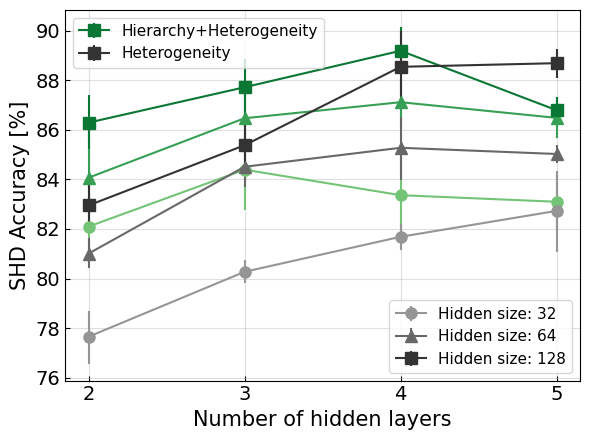

In [2]:
### Number of Layers
# load file
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
file_dir = '/Users/filippomoro/Documents/hsnn/results'
file_name = os.path.join( file_dir, 'Sweep_N_layers_train_alpha_False_wandb_export_2024-03-25T11_34_57.357+01_00.csv' )
df = pd.read_csv( file_name, delimiter=',' )

fig, ax = plt.subplots( figsize=(6,4.5) )
n_layers_list = np.sort( list( set( list(df['n_layers'] ) ) ) )
n_hid_list = np.sort( list( set( list(df['n_hid'] ) ) ) )
# delete unnecessary datapoints
n_hid_list = np.delete( n_hid_list, n_hid_list==256 )
n_hid_list = np.delete( n_hid_list, n_hid_list==512 )
# list of markers
marker_list = ['o', '^', 's', '*', 'X', '+']
# list of colors
cmap_green = plt.get_cmap('Greens')
cmap_blues = plt.get_cmap('Grays')
plots_hierarchy, plots_hetero = [], []
for h, n_hid in enumerate(n_hid_list):
    # Heterogeneity
    mean_acc_n_layers = np.array( [ df['Test Acc'][df['n_layers']==tau][df['hierarchy_tau']==True][df['n_hid']==n_hid].mean() for tau in n_layers_list] )
    max_acc_n_layers  = np.array( [ df['Test Acc'][df['n_layers']==tau][df['hierarchy_tau']==True][df['n_hid']==n_hid].quantile(0.85) for tau in n_layers_list] )
    min_acc_n_layers  = np.array( [ df['Test Acc'][df['n_layers']==tau][df['hierarchy_tau']==True][df['n_hid']==n_hid].quantile(0.15) for tau in n_layers_list] )
    # Homogeneity
    mean_acc_n_layers_hom = np.array( [ df['Test Acc'][df['n_layers']==tau][df['hierarchy_tau']==False][df['n_hid']==n_hid].mean() for tau in n_layers_list] )
    max_acc_n_layers_hom  = np.array( [ df['Test Acc'][df['n_layers']==tau][df['hierarchy_tau']==False][df['n_hid']==n_hid].quantile(0.85) for tau in n_layers_list] )
    min_acc_n_layers_hom  = np.array( [ df['Test Acc'][df['n_layers']==tau][df['hierarchy_tau']==False][df['n_hid']==n_hid].quantile(0.15) for tau in n_layers_list] )

    # Heterogeneity
    # ax.plot( n_layers_list, mean_acc_n_layers, color=cmap_green(int(128+128*h/len(n_hid_list))), marker=marker_list[h], ms=8, label=r'Hierarchy $\tau$ H:'+str(n_hid) )
    # ax.fill_between( n_layers_list, min_acc_n_layers, max_acc_n_layers, color='tab:green', alpha=0.0 )
    yerr_list = [mean_acc_n_layers-min_acc_n_layers, max_acc_n_layers-mean_acc_n_layers]
    hierarchy_plot = ax.errorbar( n_layers_list, mean_acc_n_layers, yerr=yerr_list, 
                 color=cmap_green(int(128+128*h/len(n_hid_list))), 
                 marker=marker_list[h], ms=8, 
                 label=r'Hierarchy $\tau$ H:'+str(n_hid))
    plots_hierarchy.append( hierarchy_plot )
    # Homogeneity
    yerr_list = [mean_acc_n_layers_hom-min_acc_n_layers_hom, max_acc_n_layers_hom-mean_acc_n_layers_hom]
    # ax.plot( n_layers_list, mean_acc_n_layers_hom, color=cmap_blues(int(128+128*h/len(n_hid_list))), marker=marker_list[h], ms=8, label=r'Heterogeneity $\tau$ H:'+str(n_hid) )
    # ax.fill_between( n_layers_list, min_acc_n_layers_hom, max_acc_n_layers_hom, color='tab:blue', alpha=0.0 )
    heterogeneous_plot = ax.errorbar( n_layers_list, mean_acc_n_layers_hom, yerr=yerr_list, 
                 color=cmap_blues(int(128+128*h/len(n_hid_list))), 
                 marker=marker_list[h], ms=8, 
                 label=r'Hierarchy $\tau$ H:'+str(n_hid))
    plots_hetero.append( heterogeneous_plot )

ax.set_xlabel('Number of hidden layers', size=15); ax.set_ylabel('SHD Accuracy [%]', size=15)
ax.set_xticks( n_layers_list, n_layers_list-1 )
ax.tick_params( direction='in', labelsize=14 )
# legend
legend1 = ax.legend(prop={'size':11}, loc=2, handles=[plots_hierarchy[-1], plots_hetero[-1]], labels=['Hierarchy+Heterogeneity', 'Heterogeneity'])
legend2 = ax.legend(prop={'size':11}, loc=4, handles=plots_hetero, labels=['Hidden size: '+str(n_hid) for n_hid in n_hid_list])
pyplot.gca().add_artist(legend1)
ax.grid(alpha=0.4)
plt.tight_layout()
# fig.savefig( os.path.join( os.getcwd(), 'results/Sweep_n_layers.pdf' ), dpi=300, transparent=True )

### MTS_XOR problem

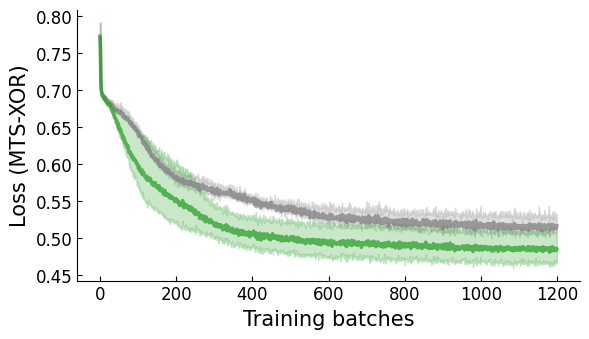

In [3]:
# import the data
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
file_save_tau_F2 = './results/F2/Convergence_loss_0205_mts_xor.pkl'
dict_tau_F2 = pickle.load( open(file_save_tau_F2, 'rb' ) )
train_loss_list = dict_tau_F2['train_loss_list']
train_loss_hierarchy_list = dict_tau_F2['train_loss_hierarchy_list']
test_accs = dict_tau_F2['test_accs']
test_accs_hierarchy = dict_tau_F2['test_accs_hierarchy']

fig, ax = plt.subplots( figsize=(6,3.5) )
# Without Hierarchy
_ = ax.plot( np.mean(train_loss_list, axis=0), color='gray', ls='-', lw=2.5, alpha=0.75 )
_ = ax.fill_between( np.arange(0, np.array(train_loss_list).shape[1]), 
                    np.quantile(train_loss_list, axis=0, q=0.35), np.quantile(train_loss_list, axis=0, q=0.85), 
                     color='gray', alpha=0.25 )
# With Hierarchy
_ = ax.plot( np.mean(train_loss_hierarchy_list, axis=0), color='tab:green', ls='-', lw=2.5, alpha=0.75 )
_ = ax.fill_between( np.arange(0, np.array(train_loss_hierarchy_list).shape[1]), 
                    np.quantile(train_loss_hierarchy_list, axis=0, q=0.35), np.quantile(train_loss_hierarchy_list, axis=0, q=0.85), 
                     color='tab:green', alpha=0.25 )

ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel( 'Training batches', size=15 )
ax.set_ylabel( 'Loss (MTS-XOR)', size=15 )
ax.tick_params( direction='in', labelsize=12 )

plt.tight_layout()


/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_27640/259330840.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df_origin[df_origin['experiment_name']=='hsnn_MTS_XOR_tau_mem'][ df_origin['n_layers']==4 ]
/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_27640/259330840.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df_origin[df_origin['experiment_name']=='hsnn_MTS_XOR_tau_mem'][ df_origin['n_layers']==3 ]


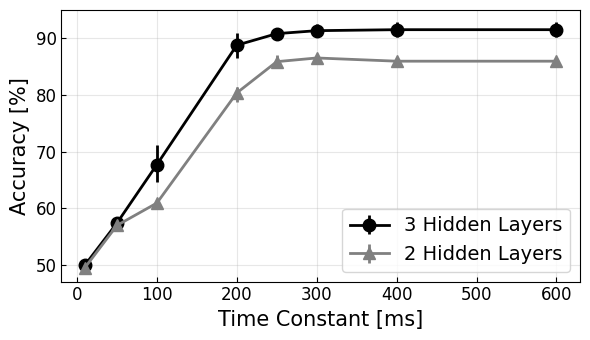

In [52]:
### time constant sweep
# load file
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_dir = '/Users/filippomoro/Documents/hsnn/results'
file_name = os.path.join( file_dir, 'Sweep_mtsxor_wandb_export_2024-04-25T14_46_41.105+02_00.csv' )
df_origin = pd.read_csv( file_name, delimiter=',' )


#####################################
### select the feed-forward LIF model
df = df_origin[df_origin['experiment_name']=='hsnn_MTS_XOR_tau_mem'][ df_origin['n_layers']==4 ]
df3 = df_origin[df_origin['experiment_name']=='hsnn_MTS_XOR_tau_mem'][ df_origin['n_layers']==3 ]

tau_mem_list = np.sort( list( set( list(df['tau_mem'] ) ) ) )
# With Heterogeneity of Time constant
mean_acc_tau_mem = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']=='normal'].mean() for tau in tau_mem_list] )
max_acc_tau_mem = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']=='normal'].quantile(0.85) for tau in tau_mem_list] )
min_acc_tau_mem = np.array( [ df['Test Acc'][df['tau_mem']==tau][df['distrib_tau']=='normal'].quantile(0.15) for tau in tau_mem_list] )
# With Homogeneity of Time constant
mean_acc_tau_mem_3 = np.array( [ df3['Test Acc'][df3['tau_mem']==tau][df3['distrib_tau']=='normal'].mean() for tau in tau_mem_list] )
max_acc_tau_mem_3 = np.array( [ df3['Test Acc'][df3['tau_mem']==tau][df3['distrib_tau']=='normal'].quantile(0.85) for tau in tau_mem_list] )
min_acc_tau_mem_3 = np.array( [ df3['Test Acc'][df3['tau_mem']==tau][df3['distrib_tau']=='normal'].quantile(0.15) for tau in tau_mem_list] )

fig, ax = plt.subplots( figsize=(6,3.5) )
# With Heterogeneity of Time constant
# ax.plot( tau_mem_list*1e3, mean_acc_tau_mem, color='k', marker='o', ms=9, label=r'Heterogeneous $\tau$' )
# ax.fill_between( tau_mem_list*1e3, min_acc_tau_mem, max_acc_tau_mem, color='k', alpha=0.2 )
yerr_list = [mean_acc_tau_mem-min_acc_tau_mem, max_acc_tau_mem-mean_acc_tau_mem]
hierarchy_plot = ax.errorbar( tau_mem_list*1e3, mean_acc_tau_mem, yerr=yerr_list,
                color='k', marker='o', ms=9, lw=2,
                label=r'3 Hidden Layers')
# With Homogeneity of Time constant
# ax.plot( tau_mem_list*1e3, mean_acc_tau_mem_hom, color='gray', marker='^', ms=9, label=r'Homogeneous $\tau$' )
# ax.fill_between( tau_mem_list*1e3, min_acc_tau_mem_hom, max_acc_tau_mem_hom, color='gray', alpha=0.1 )
# yerr_list = [mean_acc_tau_mem_hom-min_acc_tau_mem_hom, max_acc_tau_mem_hom-mean_acc_tau_mem_hom]
yerr_list = [mean_acc_tau_mem_3-min_acc_tau_mem_3, max_acc_tau_mem_3-mean_acc_tau_mem_3]
hierarchy_plot = ax.errorbar( tau_mem_list*1e3, mean_acc_tau_mem_3, yerr=yerr_list,
                color='gray', marker='^', ms=9, lw=2,
                label=r'2 Hidden Layers')
# plot setting
# ax.set_title( 'Feed-Forward SNN', size=17 )
ax.set_xlabel('Time Constant [ms]', size=15); ax.set_ylabel('Accuracy [%]', size=15)
ax.tick_params( direction='in', labelsize=12 )
ax.legend(prop={'size':14})
ax.grid(alpha=0.3)
plt.tight_layout()
fig.savefig( os.path.join( os.getcwd(), 'results/Tau_mem_sweep.pdf' ), dpi=300, transparent=True )

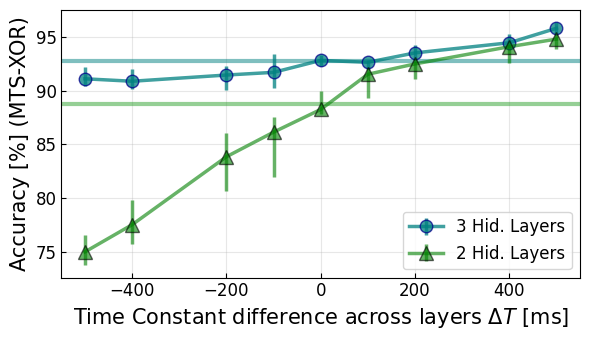

In [46]:
### delta tau --> hierarchical
# load file
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_dir = '/Users/filippomoro/Documents/hsnn/results'
# file_name = os.path.join( file_dir, 'Sweep_mtsxor_wandb_export_2024-04-26T09_32_47.974+02_00.csv' )
# file_name = os.path.join( file_dir, 'Sweep_delta_tau_mtsxor_wandb_export_2024-05-02T17_14_12.581+02_00.csv' )
file_name = os.path.join( file_dir, 'Sweep_delta_tau_mtsxor_wandb_export_2024-05-02T19_04_12.238+02_00.csv' )
df_origin = pd.read_csv( file_name, delimiter=',' )

#####################################
### select the feed-forward LIF model
df4 = df_origin[df_origin['experiment_name']=='MTS_XOR_delta_tau'][ df_origin['n_layers']==4 ]
df3 = df_origin[df_origin['experiment_name']=='MTS_XOR_delta_tau'][ df_origin['n_layers']==3 ]

delta_tau_list = np.sort( list( set( list(df4['delta_tau'] ) ) ) )
# delete two unnecessary datapoints
# delta_tau_list = np.delete( delta_tau_list, delta_tau_list==0.001 )
# delta_tau_list = np.delete( delta_tau_list, delta_tau_list==-0.001 )
# Heterogeneity 4 layers
mean_acc_delta_tau = np.array( [ df4['Test Acc'][df4['delta_tau']==tau][df4['distrib_tau']=='normal'].median() for tau in delta_tau_list] )
max_acc_delta_tau = np.array( [ df4['Test Acc'][df4['delta_tau']==tau][df4['distrib_tau']=='normal'].quantile(0.85) for tau in delta_tau_list] )
min_acc_delta_tau = np.array( [ df4['Test Acc'][df4['delta_tau']==tau][df4['distrib_tau']=='normal'].quantile(0.15) for tau in delta_tau_list] )
# Heterogeneity 3 layers
mean_acc_delta_tau3 = np.array( [ df3['Test Acc'][df3['delta_tau']==tau][df3['distrib_tau']=='normal'].median() for tau in delta_tau_list] )
max_acc_delta_tau3 = np.array( [ df3['Test Acc'][df3['delta_tau']==tau][df3['distrib_tau']=='normal'].quantile(0.85) for tau in delta_tau_list] )
min_acc_delta_tau3 = np.array( [ df3['Test Acc'][df3['delta_tau']==tau][df3['distrib_tau']=='normal'].quantile(0.15) for tau in delta_tau_list] )
# Homogeneity
mean_acc_delta_tau_hom = np.array( [ df4['Test Acc'][df4['delta_tau']==tau][df4['distrib_tau']=='false'].median() for tau in delta_tau_list] )
max_acc_delta_tau_hom = np.array( [ df4['Test Acc'][df4['delta_tau']==tau][df4['distrib_tau']=='false'].quantile(0.85) for tau in delta_tau_list] )
min_acc_delta_tau_hom = np.array( [ df4['Test Acc'][df4['delta_tau']==tau][df4['distrib_tau']=='false'].quantile(0.15) for tau in delta_tau_list] )

fig, ax = plt.subplots( figsize=(6,3.5) )
# Heterogeneity 3 layers
# ax.fill_between( delta_tau_list*1e3, min_acc_delta_tau, max_acc_delta_tau, color='tab:green', alpha=0.2 )
yerr_list = [mean_acc_delta_tau-min_acc_delta_tau, max_acc_delta_tau-mean_acc_delta_tau]
hierarchy_plot = ax.errorbar( delta_tau_list*1e3, mean_acc_delta_tau, yerr=yerr_list, 
                color='teal', marker='o', ms=9, alpha=0.75, lw=2.5, markeredgecolor='darkblue',
                label=r'3 Hid. Layers')
# plot a horizontal line for clarity
ax.hlines( df4['Test Acc'][df4['delta_tau']==0.][df4['distrib_tau']=='normal'].mean(), 
           -1000, 1000, color='teal', lw=3, alpha=0.5, ls='-' )
ax.set_xlim( delta_tau_list[0]*1e3*1.1, delta_tau_list[-1]*1e3*1.1 )

# Heterogeneity 2 layers
yerr_list = [mean_acc_delta_tau3-min_acc_delta_tau3, max_acc_delta_tau3-mean_acc_delta_tau3]
hierarchy_plot = ax.errorbar( delta_tau_list*1e3, mean_acc_delta_tau3, yerr=yerr_list, 
                color='green', marker='^', ms=10, alpha=0.6, lw=2.5, markeredgecolor='k',
                label=r'2 Hid. Layers')
# plot a horizontal line for clarity
ax.hlines( df3['Test Acc'][df3['delta_tau']==0.][df3['distrib_tau']=='normal'].mean(), -1000, 1000, 
           color='tab:green', lw=3, alpha=0.5, ls='-' )
ax.set_xlim( delta_tau_list[0]*1e3*1.1, delta_tau_list[-1]*1e3*1.1 )

ax.set_xlabel('Time Constant difference across layers $\Delta T$ [ms]', size=15)
ax.set_ylabel('Accuracy [%] (MTS-XOR)', size=15)
ax.tick_params( direction='in', labelsize=12 )
ax.legend(prop={'size':12}, loc=4)
ax.grid(alpha=0.3)
plt.tight_layout()
fig.savefig( os.path.join( os.getcwd(), 'results/Delta_tau_MTSXOR_sweep.pdf' ), dpi=300, transparent=True )

# Figure 3
---
#### This Figure serves as an analysis on "why" and "how" hierarchy of time constant helps the model performance.

##### First, we look at the activity of simple SNN models with and without hierarchy. 
##### Then, time constants are optimized starting from scratch, observing hierarchy and heterogeneity naturally emerge.

/var/folders/gr/cpg6p4_95b3fghclqyk0n2d00000gn/T/ipykernel_3513/1778462134.py:27: RuntimeWarning: divide by zero encountered in log
  ds_train = - 1e3 * args.timestep / np.log( ds_train )


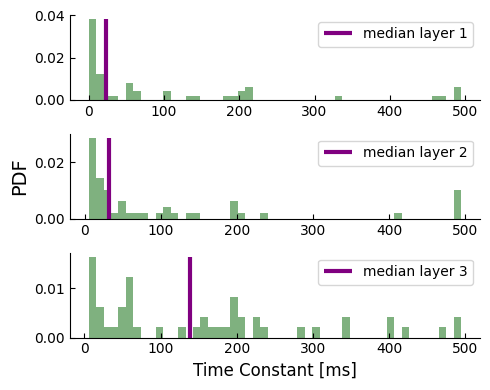

In [49]:
### MTS-XOR
### Training tau: finding hierarchy

# import the data
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
file_save_tau_F2 = './results/F2/Tau_analysis_2504_mts_xor.pkl'
dict_tau_F2 = pickle.load( open(file_save_tau_F2, 'rb' ) )
args = dict_tau_F2['args']; seeds = dict_tau_F2['seeds']
time_const_init_list = dict_tau_F2['time_const_init_list']
time_const_train_list = dict_tau_F2['time_const_train_list']
test_accs = dict_tau_F2['test_accs' ]


# Initialized taus
ds_init  = np.clip( np.hstack( time_const_init_list ), 0, 1.0-2e-2)
ds_init  = - 1e3 * args.timestep / np.log( ds_init )

fig, ax = plt.subplots( ds_init.shape[0],1, figsize=(5,4) )
# for i in range(ds_init.shape[0]):
#     _ = ax[i].hist( ds_init[i], 50, color='k', density=True, alpha=1 )

# Optimized taus
ds_train = np.clip( np.hstack( time_const_train_list ), 0, 1.0-2e-2)
ds_train = - 1e3 * args.timestep / np.log( ds_train )
medians = np.zeros( (ds_init.shape[0]) )
for i in range(ds_init.shape[0]):
    [n, bins, patches] = ax[i].hist( ds_train[i], 50, color='darkgreen', density=True, alpha=0.5 )
    _ = ax[i].vlines( np.quantile( ds_train[i], q=0.5 ), 0, np.max(n), color='purple', lw=3, alpha=1, label=f'median layer {i+1}' )
    # _ = ax[i].vlines( np.quantile( ds_train[i], q=0.15 ), 0, np.max(n), color='tab:blue', lw=3, alpha=0.75, label=r'-1$\sigma$' )
    # _ = ax[i].vlines( np.quantile( ds_train[i], q=0.85 ), 0, np.max(n), color='tab:blue', lw=3, alpha=0.75, label=r'+1$\sigma$' )
    # _ = ax[0].hist( ds_train[i], 50, density=False, alpha=0.5 )
    # ax[i].grid(alpha=0.3)
    medians[i] = np.quantile( ds_train[i], q=0.5 )
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].tick_params( direction='in', labelsize=10 )
    ax[i].legend( ncols=3 )

ax[1].set_ylabel( 'PDF', size=14 )
ax[-1].set_xlabel( 'Time Constant [ms]', size=12 )
# ax[-1].tick_params( direction='in', labelsize=12 )
# [ ax[i].set_xticks( np.arange( args.n_layers-1 ), np.arange( args.n_layers-1 )+1 )
#  for i in range(ds_init.shape[0]) ]
# ax.legend(prop={'size':14})


plt.tight_layout()
file_save_F2_tau = f'./results/F2/Tau_analysis_{args.n_layers}_PDF.pdf'
# fig.savefig( file_save_F2_tau, dpi = 300, transparent=False )

In [50]:
tanh = lambda x, a, c: (np.exp(2*(x-c)/a)-1)/(np.exp(2*(x-c)/a)+1)
rescale = lambda x: ( x - np.min(x) ) / (np.max( np.abs( x - np.min(x) ) )) - 0.5

from scipy.optimize import curve_fit
layers = np.linspace(0,1,args.n_layers-1)
popv, popt = curve_fit( tanh, layers, rescale(medians), bounds=((0,0), (1,1)) )
print(popv)

[0.80299859 0.67451027]


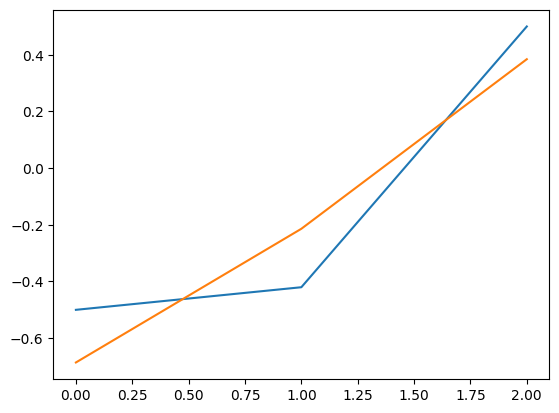

In [53]:
plt.plot( rescale( medians ) )
plt.plot(  tanh( layers, *popv ) )
# plt.plot( rescale( tanh( layers, 0.2, 0.1 ) ) )

Text(0, 0.5, 'Median Time Constant [ms]')

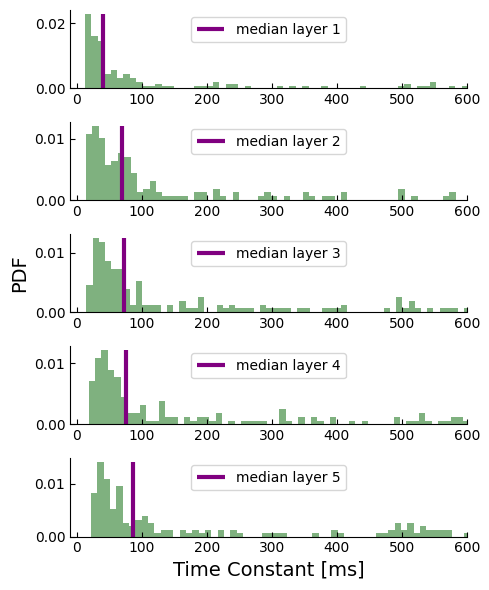

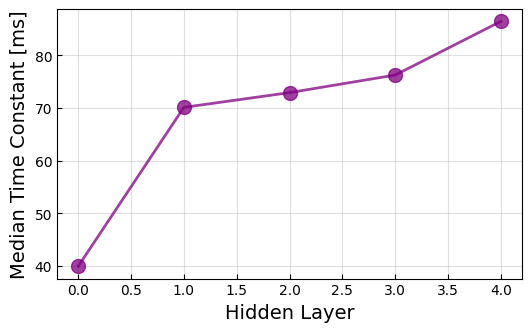

In [64]:
# import the data
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
file_save_tau_F2 = './results/F2/Tau_analysis_0205.pkl'
dict_tau_F2 = pickle.load( open(file_save_tau_F2, 'rb' ) )
args = dict_tau_F2['args']; seeds = dict_tau_F2['seeds']
time_const_init_list = dict_tau_F2['time_const_init_list']
time_const_train_list = dict_tau_F2['time_const_train_list']
test_accs = dict_tau_F2['test_accs' ]


# Initialized taus
ds_init  = np.clip( np.hstack( time_const_init_list ), 0, 1.0-1e-2)
ds_init  = - 1e3 * args.timestep / np.log( ds_init )

fig, ax = plt.subplots( ds_init.shape[0],1, figsize=(5,6) )
# for i in range(ds_init.shape[0]):
#     _ = ax[i].hist( ds_init[i], 50, color='k', density=True, alpha=1 )

# Optimized taus
ds_train = np.clip( np.hstack( time_const_train_list ), 0, 1.0-1e-2)
ds_train = - 1e3 * args.timestep / np.log( ds_train )
medians = np.zeros( (ds_init.shape[0]) )
for i in range(ds_init.shape[0]):
    [n, bins, patches] = ax[i].hist( ds_train[i], 100, color='darkgreen', density=True, alpha=0.5 )
    _ = ax[i].vlines( np.quantile( ds_train[i], q=0.5 ), 0, np.max(n), color='purple', lw=3, alpha=1, label=f'median layer {i+1}' )
    # _ = ax[0].hist( ds_train[i], 50, density=False, alpha=0.5 )
    medians[i] = np.quantile( ds_train[i], q=0.5 )
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].tick_params( direction='in', labelsize=10 )
    ax[i].legend( loc=9 )
    ax[i].set_xlim( -10, 600 )

# ax.set_yscale('log')
ax[2].set_ylabel( 'PDF', size=14 )
ax[-1].set_xlabel( 'Time Constant [ms]', size=14 )
# ax[-1].tick_params( direction='in', labelsize=12 )
# [ ax[i].set_xticks( np.arange( args.n_layers-1 ), np.arange( args.n_layers-1 )+1 )
#  for i in range(ds_init.shape[0]) ]
# ax.legend(prop={'size':14})
# ax.grid(alpha=0.3)

plt.tight_layout()
file_save_F2_tau = f'./results/F2/Tau_analysis_{args.n_layers}_PDF.pdf'
# fig.savefig( file_save_F2_tau, dpi = 300, transparent=False )

fig, ax = plt.subplots( figsize=(6,3.5) )
ax.plot( medians, color='purple', marker='o', ms=10, lw=2, alpha=0.75 )
ax.grid(alpha=0.4)
ax.tick_params( direction='in', labelsize=10 )
ax.set_xlabel( 'Hidden Layer', size=14 )
ax.set_ylabel( 'Median Time Constant [ms]', size=14 )

Fitting the hierarchy with the tanh function

In [57]:
tanh = lambda x, a, c: (np.exp(2*(x-c)/a)-1)/(np.exp(2*(x-c)/a)+1)
rescale = lambda x: ( x - np.min(x) ) / (np.max( np.abs( x - np.min(x) ) )) - 0.5

from scipy.optimize import curve_fit
layers = np.linspace(0,1,args.n_layers-1)
popv, popt = curve_fit( tanh, layers, rescale(medians), bounds=((0,0), (1,1)) )
print(popv)

[1.         0.34307015]


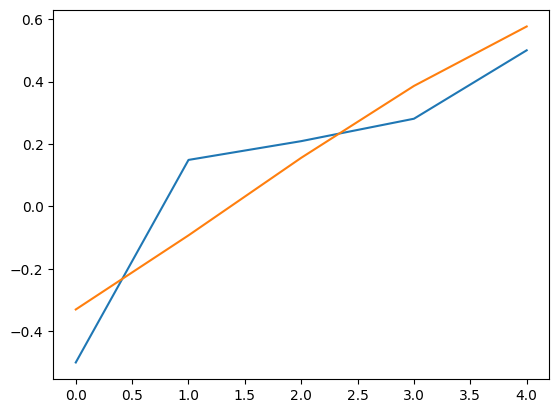

In [58]:
plt.plot( rescale( medians ) )
# plt.plot( rescale( tanh( layers, *popv ) ) )
plt.plot( tanh( layers, *popv ) )
# plt.plot( rescale( tanh( layers, 0.2, 0.1 ) ) )

# Figure 4
---
#### This Figure explores the performance of temporal convolutions based SNN

##### First, a simple cSNN is optimized as a function of the kernel size, that being the same throughout layers.
##### Then, differences in kernel size is imposed based on hierarchy, looking at the performance.